# **Barcode analyzer from https://github.com/friburgo-moc/FidelityFinder**


In [1]:
#@markdown # Upload your json file with the barcodes found and their frequency

#@markdown Example of json file content:
#@markdown {"CGGTCTGACAACTA": 4, "ACAAACTTTTATCA": 5, "TGAATCTGGTACTA": 8}

from google.colab import files
uploaded = files.upload()
barcodes_file=list(uploaded.keys())[0]

Saving HN00191375_BH10ala11_barcodes.json to HN00191375_BH10ala11_barcodes.json


In [17]:
#@markdown # Input parameters
out_prefix = "sample_name " #@param {type:"string"}
barcode_length = 14 #@param {type:"number"}

	Step 1 => Open & read input file
	Step 1 done

	Step 2 => Filtering right barcodes sizes
	Step 2 done

	Step 3 => Normalizing frequencies values
	Step 3 done

	Step 4 => Extracting data
	Step 4 done

	Step 5 => Drawing plot
	Step 5 done



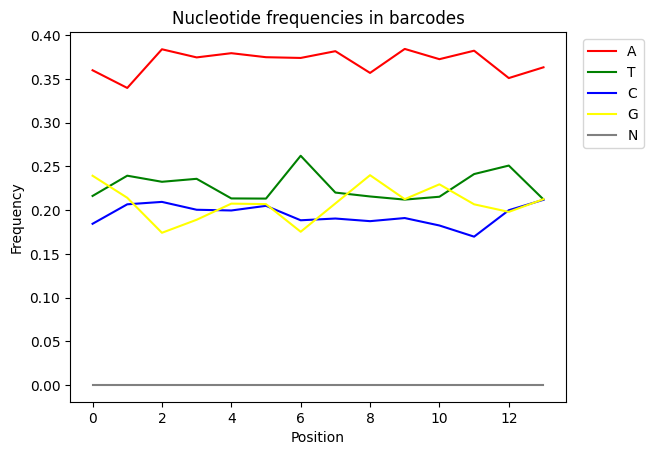

In [18]:
#@markdown # Main program

# encoding:UTF-8

# Imports
import json
import matplotlib.pyplot as plt



########################################################################################

__doc__ = """
SYNOPSIS

 Python script to generate graphs of the barcodes provided

AUTHORS

    Javier Martinez del Río (javier.martinez@cbm.csic.es)

"""
__author__ = "Javier Martínez del Río"
__version__ = 'v1'


## Parameters catching
##--------------------

# defaults
out_prefix    = "undefined"


## Main program
##-------------

print("\tStep 1 => Open & read input file")
with open(barcodes_file, 'r') as json_file:
    raw_barcodes_dic = json.load(json_file)
print("\tStep 1 done\n")


print("\tStep 2 => Filtering right barcodes sizes")
barcodes_dic={}
for barcode, freq in raw_barcodes_dic.items():
  if len(barcode) == barcode_length:
    barcodes_dic[barcode] = freq
print("\tStep 2 done\n")


print("\tStep 3 => Normalizing frequencies values")
total_barcodes = sum(barcodes_dic.values())
barcodes_dic_normalized={}
for barcode, freq in barcodes_dic.items():
  barcodes_dic_normalized[barcode] = freq/total_barcodes
print("\tStep 3 done\n")


print("\tStep 4 => Extracting data")
# Create a dictionary to store nucleotide frequencies for each position
positions_dic={pos: [0,0,0,0,0] for pos in range(barcode_length)}
for barcode, normalized_freq in barcodes_dic_normalized.items():
  for pos, nucleotide in enumerate(barcode):
    nucleotide = nucleotide.upper()
    if nucleotide == "A":
      positions_dic[pos][0] += normalized_freq
    elif nucleotide == "T":
      positions_dic[pos][1] += normalized_freq
    elif nucleotide == "C":
      positions_dic[pos][2] += normalized_freq
    elif nucleotide == "G":
      positions_dic[pos][3] += normalized_freq
    else:
      positions_dic[pos][4] += normalized_freq
# Extract individual nucleotide frequency lists from positions_dic
A = [positions_dic[pos][0] for pos in range(len(positions_dic))]
T = [positions_dic[pos][1] for pos in range(len(positions_dic))]
C = [positions_dic[pos][2] for pos in range(len(positions_dic))]
G = [positions_dic[pos][3] for pos in range(len(positions_dic))]
N = [positions_dic[pos][4] for pos in range(len(positions_dic))]
print("\tStep 4 done\n")


print("\tStep 5 => Drawing plot")
plot_file = out_prefix + ".png"
plt.plot(list(positions_dic.keys()), A, label='A', linestyle='-', color='red', marker=None)
plt.plot(list(positions_dic.keys()), T, label='T', linestyle='-', color='green', marker=None)
plt.plot(list(positions_dic.keys()), C, label='C', linestyle='-', color='blue', marker=None)
plt.plot(list(positions_dic.keys()), G, label='G', linestyle='-', color='yellow', marker=None)
plt.plot(list(positions_dic.keys()), N, label='N', linestyle='-', color='gray', marker=None)
plt.title('Nucleotide frequencies in barcodes')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.savefig(plot_file, bbox_inches='tight')
print("\tStep 5 done\n")

In [19]:
#@markdown # Download files
files.download(plot_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>